In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [3]:
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [5]:
# 전처리 전, 하나의 데이터프레임으로 합치기
all_df = pd.concat([train,test],sort=False).reset_index(drop=True)
all_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN


In [6]:
# id와 목적변수 제거
all_df = all_df.drop(columns=['id','NObeyesdad'],axis=1)
all_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [7]:
all_df.info()
# null값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             

In [8]:
# 수치형 변수 요약
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


In [9]:
# 범주형 변수 요약
all_df.describe(include='object').T

,count,unique,top,freq
Gender,34598,2,Female,17387
family_history_with_overweight,34598,2,yes,28398
FAVC,34598,2,yes,31565
CAEC,34598,4,Sometimes,29218
SMOKE,34598,2,no,34173
SCC,34598,2,no,33447
CALC,34598,4,Sometimes,25045
MTRANS,34598,5,Public_Transportation,27798


* 수치형 변수_시각화

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

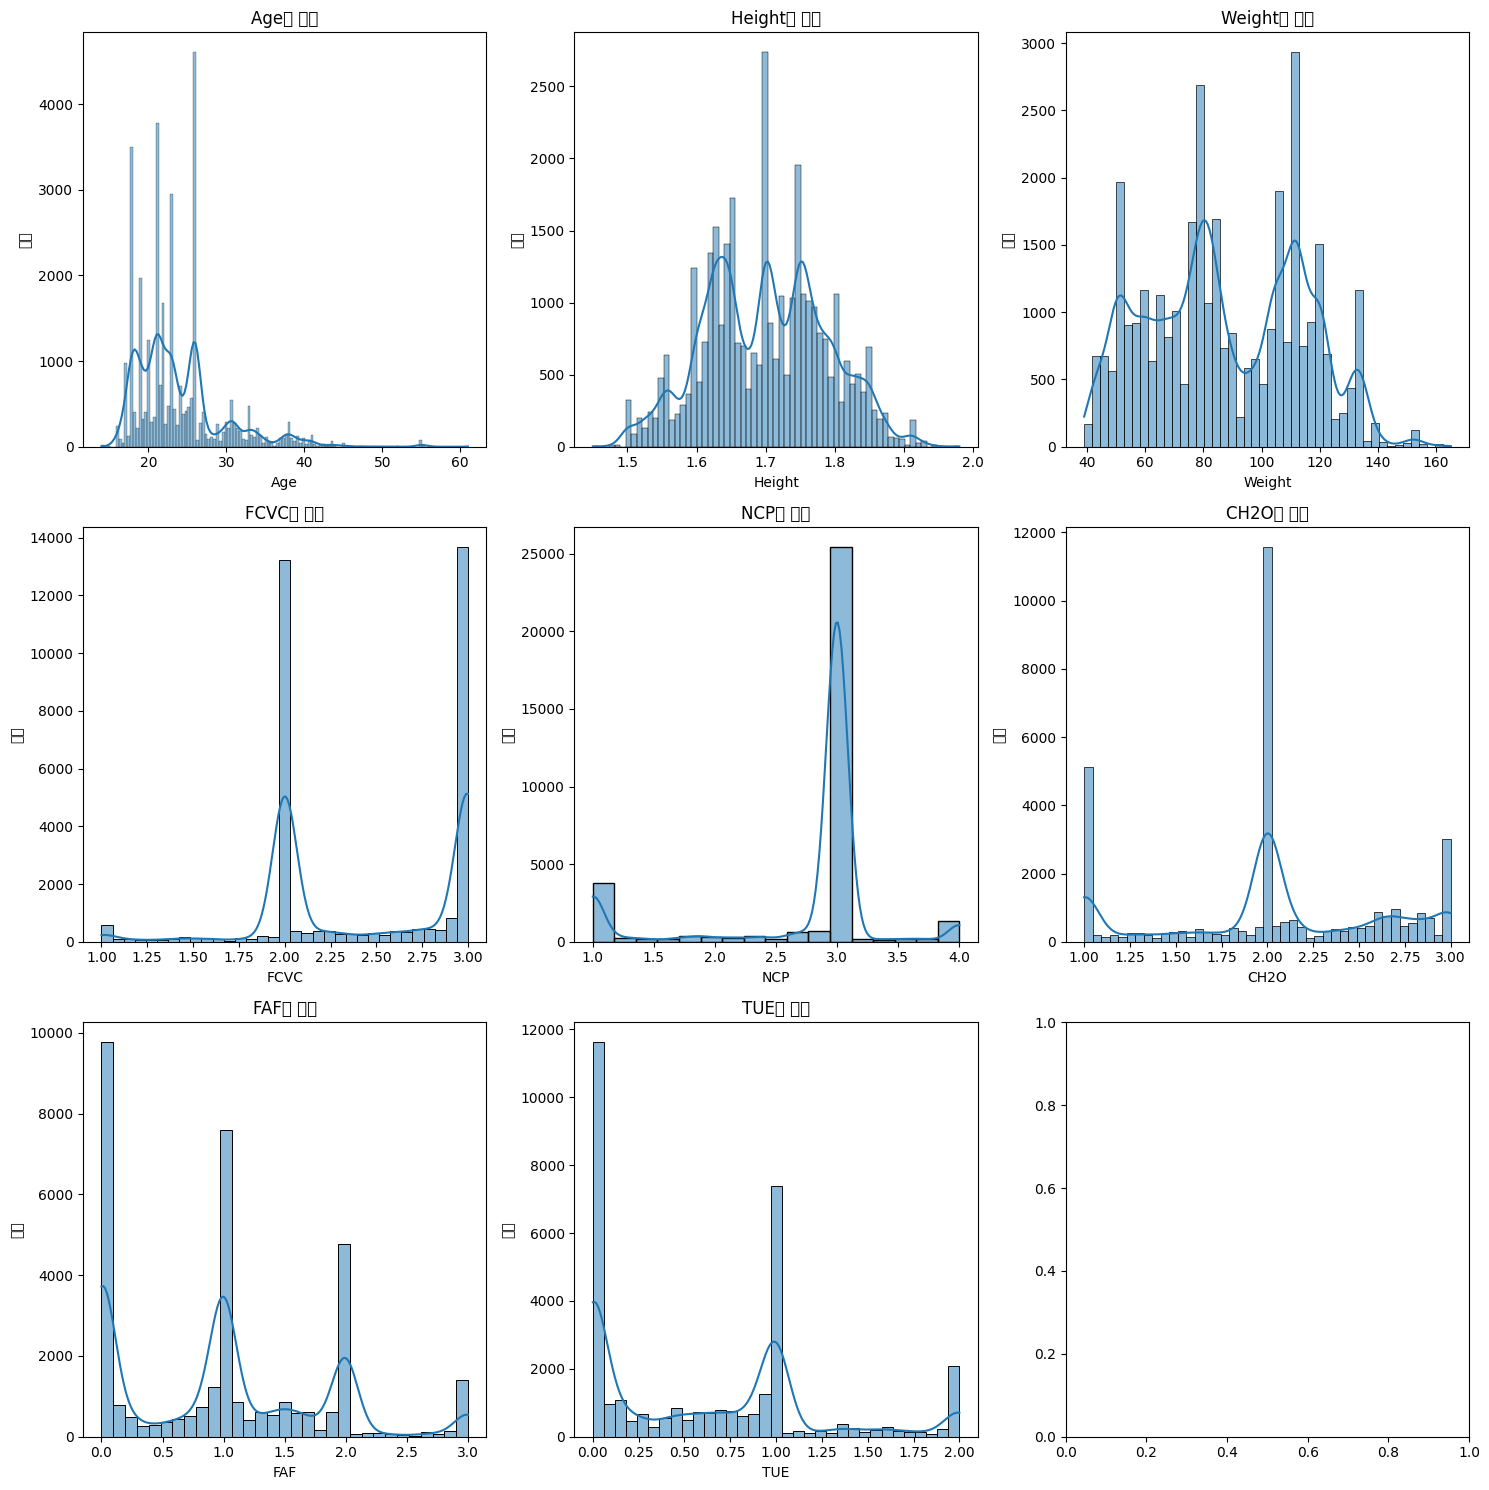

In [10]:
# 분포 시각화

# 수치형 변수 열 선택
numeric_columns = all_df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'AppleGothic'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(all_df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


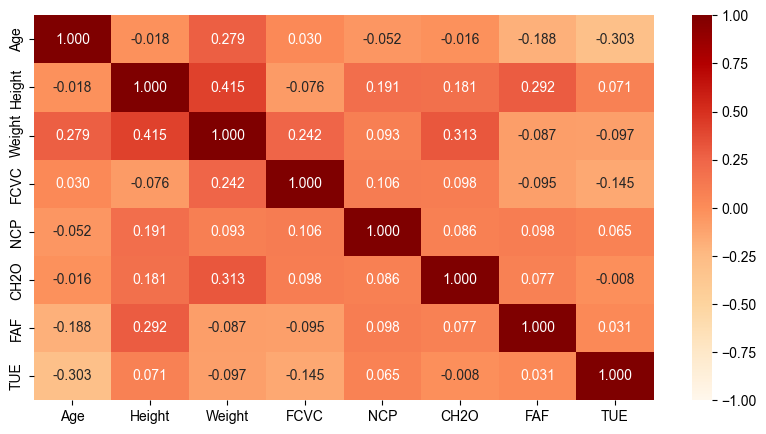

In [11]:
# 상관성 시각화

import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = all_df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

범주형 변수_시각화

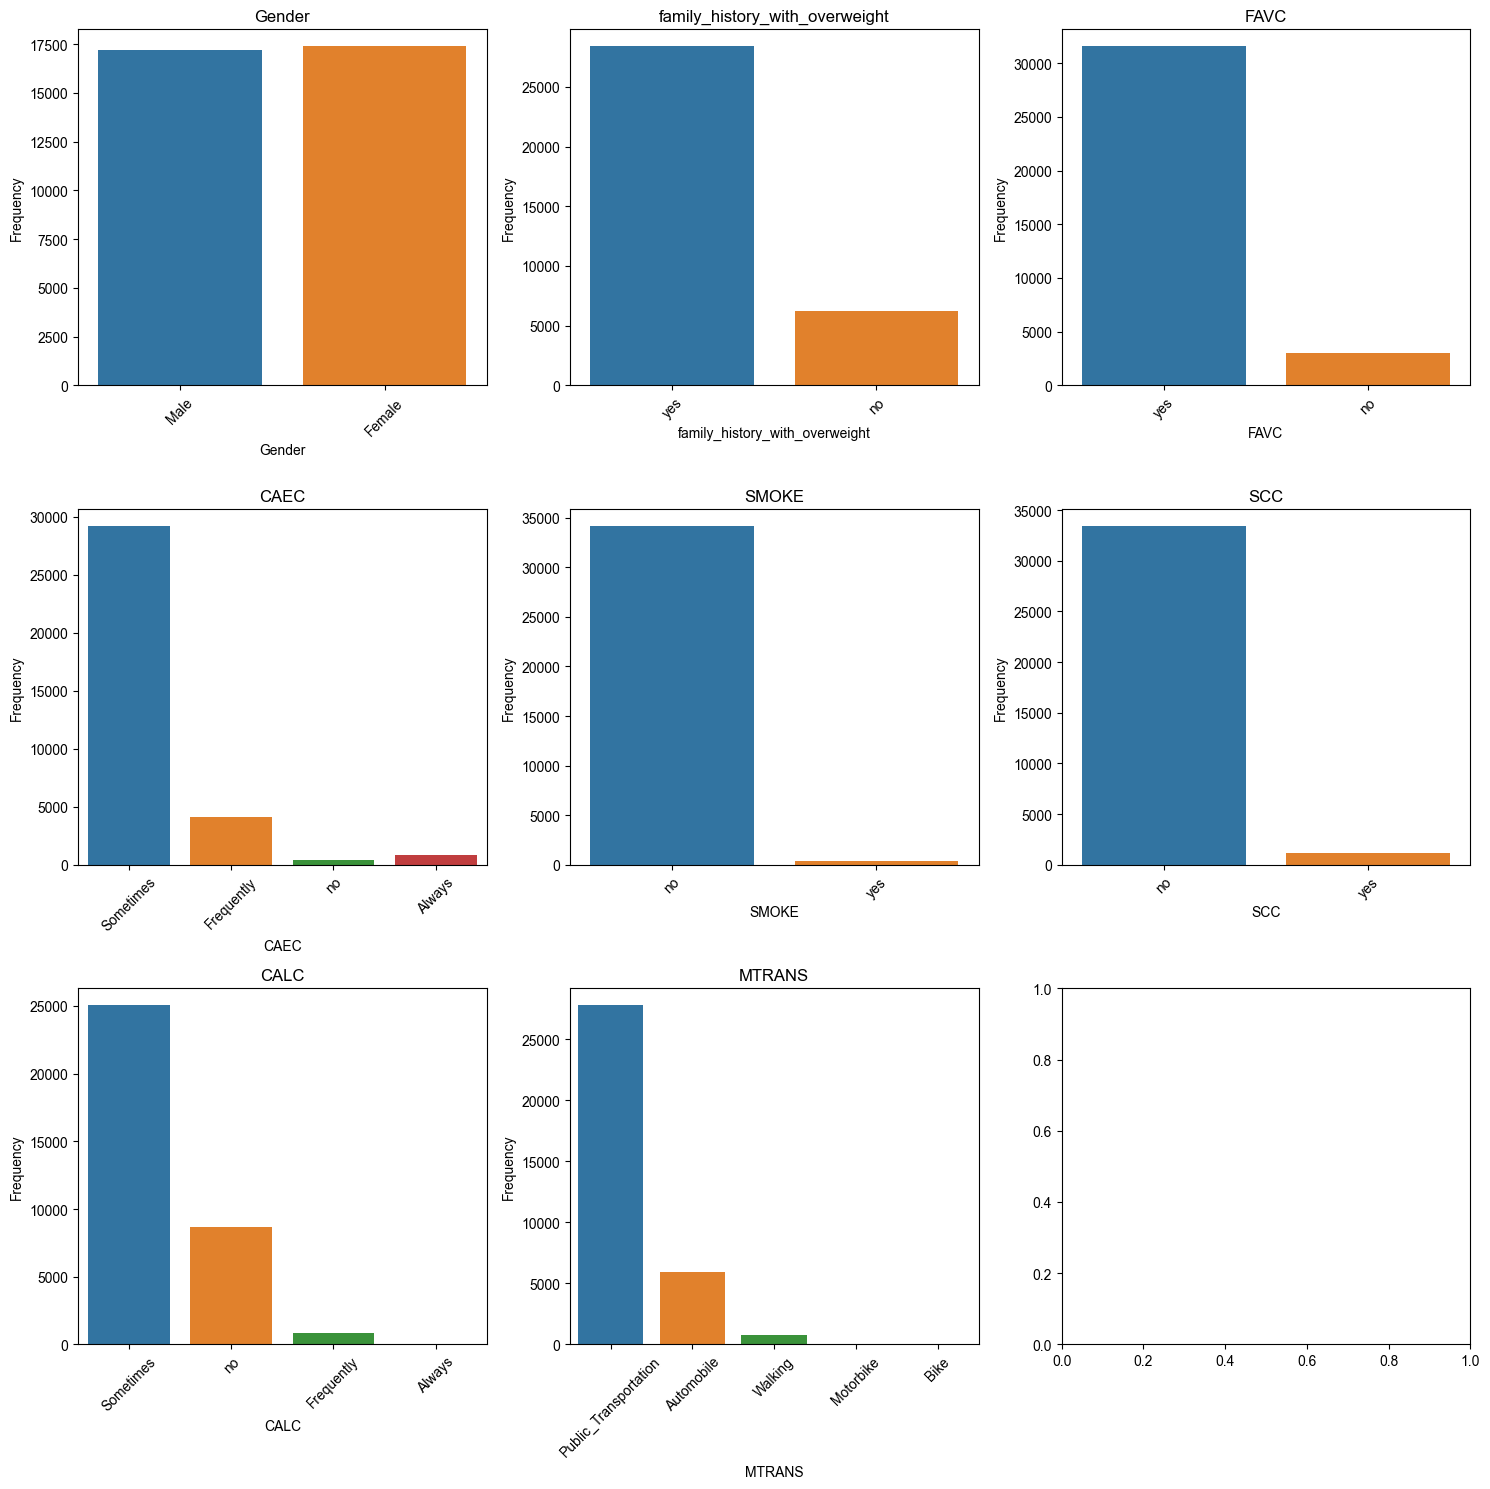

In [12]:
categorical_columns = all_df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=all_df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

# !!한글 깨짐 확인 & 색상 스타일 재설정

* 인코딩

In [13]:
''' 
- 원-핫 인코딩: (명목척도 인 것)
gender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)

- 라벨 인코딩: (서열척도 인 것)
caec(4), calc(3)
'''

' \n- 원-핫 인코딩: (명목척도 인 것)\ngender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)\n\n- 라벨 인코딩: (서열척도 인 것)\ncaec(4), calc(3)\n'

In [14]:
# 원-핫 인코딩
all_df = pd.get_dummies(all_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'MTRANS','CAEC', 'CALC'], drop_first=True)
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,True,True,...,False,False,True,False,False,True,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,False,True,...,False,False,False,False,True,False,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,False,True,...,False,False,True,False,False,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,False,True,...,False,False,True,False,False,True,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,True,True,...,False,False,True,False,False,True,False,False,False,True


In [15]:
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,True,True,...,False,False,True,False,False,True,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,False,True,...,False,False,False,False,True,False,False,False,False,True
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,False,True,...,False,False,True,False,False,True,False,False,False,True
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,False,True,...,False,False,True,False,False,True,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,True,True,...,False,False,True,False,False,True,False,False,False,True


In [16]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


* 표준화

In [17]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 34598 non-null  float64
 1   Height                              34598 non-null  float64
 2   Weight                              34598 non-null  float64
 3   FCVC                                34598 non-null  float64
 4   NCP                                 34598 non-null  float64
 5   CH2O                                34598 non-null  float64
 6   FAF                                 34598 non-null  float64
 7   TUE                                 34598 non-null  float64
 8   Gender_Male                         34598 non-null  bool   
 9   family_history_with_overweight_yes  34598 non-null  bool   
 10  FAVC_yes                            34598 non-null  bool   
 11  SMOKE_yes                           34598

In [18]:
# 데이터프레임에서 수치형 변수 추출
numerical_columns = all_df.select_dtypes(include=['float64']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [19]:
# StandardScaler 객체 생성
scaler = StandardScaler()
all_df[numerical_columns]= scaler.fit_transform(all_df[numerical_columns])
all_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,True,True,...,False,False,True,False,False,True,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,False,True,...,False,False,False,False,True,False,False,False,False,True
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,False,True,...,False,False,True,False,False,True,False,False,False,True
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,False,True,...,False,False,True,False,False,True,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,True,True,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,True,True,...,False,False,True,False,False,True,False,False,True,False
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,False,False,...,False,False,True,False,False,True,False,False,True,False
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,False,False,...,False,False,True,False,True,False,False,False,True,False
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,True,True,...,False,False,True,False,False,True,False,False,False,True


In [20]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,8.379139e-17,1.000014,-1.724397,-0.677847,-0.180431,0.368703,6.473577
Height,34598.0,-5.770926e-17,1.000014,-2.841154,-0.772118,0.003179,0.705991,3.188832
Weight,34598.0,-2.330961e-17,1.000014,-1.853090,-0.825424,-0.140313,0.907888,2.944867
FCVC,34598.0,-2.873141e-16,1.000014,-2.712750,-0.835030,-0.098628,1.042690,1.042690
NCP,34598.0,6.074875e-16,1.000014,-2.483103,0.343353,0.343353,0.343353,1.756581
CH2O,34598.0,-7.136644e-16,1.000014,-1.690520,-0.403176,-0.049985,0.853244,1.590550
FAF,34598.0,-1.887360e-16,1.000014,-1.166547,-1.158333,0.025192,0.720968,2.408672
TUE,34598.0,-1.015560e-16,1.000014,-1.016544,-1.016544,-0.097401,0.637808,2.292160


In [21]:
all_df = all_df.astype(float)


In [22]:
all_df.dtypes


Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Male                           float64
family_history_with_overweight_yes    float64
FAVC_yes                              float64
SMOKE_yes                             float64
SCC_yes                               float64
MTRANS_Bike                           float64
MTRANS_Motorbike                      float64
MTRANS_Public_Transportation          float64
MTRANS_Walking                        float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
CALC_Frequently                       float64
CALC_Sometimes                    

* 데이터 분할

In [23]:
all_df[:20758] 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,0.199063,0.419085,-0.691167,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,-1.690520,1.216932,0.637808,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,-0.049985,0.213535,0.966096,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,0.187627,-1.166547,0.594520,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
all_df[:20758] # train_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,0.199063,0.419085,-0.691167,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,-1.690520,1.216932,0.637808,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,-0.049985,0.213535,0.966096,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,0.187627,-1.166547,0.594520,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
all_df[20758:]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
20758,0.525665,1.690369,1.254428,0.927428,0.343353,1.304488,-0.147133,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20759,-0.503422,-1.134554,-0.825424,-0.835030,-2.483103,1.590550,0.025192,-1.016544,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20760,0.368703,-0.641290,0.910212,1.042690,0.343353,0.970226,-1.166547,-0.602126,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20761,-0.507041,-1.667844,0.608328,-0.835030,0.312134,1.240160,-1.053509,-1.016544,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20762,0.368703,-0.822861,0.652717,1.042690,0.343353,1.022156,-1.166547,0.209445,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 데이터 분할

In [26]:
X = all_df[:20758] # X_train은 비만유형이 없는 데이터프레임
y = train["NObeyesdad"]


label_encoder = LabelEncoder()
# 비만유형에 라벨 인코딩 적용
y = label_encoder.fit_transform(y)

In [27]:
X.shape

(20758, 23)

In [28]:
y.shape

(20758,)

In [29]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 학습 데이터를 다시 학습용과 검증용으로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [30]:
print("학습 데이터 크기:", X_train.shape)
print("검증 데이터 크기:", X_val.shape)
print("테스트 데이터 크기:", X_test.shape)
print("학습 데이터 크기:", y_train.shape)
print("검증 데이터 크기:", y_val.shape)
print("테스트 데이터 크기:", y_test.shape)


학습 데이터 크기: (14945, 23)
검증 데이터 크기: (1661, 23)
테스트 데이터 크기: (4152, 23)
학습 데이터 크기: (14945,)
검증 데이터 크기: (1661,)
테스트 데이터 크기: (4152,)


In [31]:
from sklearn.model_selection import KFold

num_classes = len(train['NObeyesdad'].unique())

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


val_acc_per_fold = []
val_loss_per_fold = []


for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f'Fold {fold + 1} 훈련 중...')


    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]


    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax') 
    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    
    # 각 fold에서의 평가 지표를 저장
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_loss_per_fold.append(val_loss)
    val_acc_per_fold.append(val_acc)
    
    print(f'Fold {fold + 1} 검증 정확도: {val_acc}')


print('\n교차 검증 결과:')
for i in range(k_folds):
    print(f'Fold {i + 1} - 검증 정확도: {val_acc_per_fold[i]}, 검증 손실: {val_loss_per_fold[i]}')


Fold 1 훈련 중...


Epoch 1/50


519/519 [==============================] - 1s 958us/step - loss: 1.5228 - accuracy: 0.4045 - val_loss: 1.0331 - val_accuracy: 0.5848
Epoch 2/50
519/519 [==============================] - 0s 751us/step - loss: 0.8921 - accuracy: 0.6273 - val_loss: 0.7889 - val_accuracy: 0.6575
Epoch 3/50
519/519 [==============================] - 0s 888us/step - loss: 0.7278 - accuracy: 0.6945 - val_loss: 0.6681 - val_accuracy: 0.7315
Epoch 4/50
519/519 [==============================] - 0s 761us/step - loss: 0.6409 - accuracy: 0.7362 - val_loss: 0.6068 - val_accuracy: 0.7601
Epoch 5/50
519/519 [==============================] - 0s 945us/step - loss: 0.5894 - accuracy: 0.7641 - val_loss: 0.5588 - val_accuracy: 0.7832
Epoch 6/50
519/519 [==============================] - 0s 866us/step - loss: 0.5510 - accuracy: 0.7866 - val_loss: 0.5250 - val_accuracy: 0.8032
Epoch 7/50
519/519 [==============================] - 0s 848us/step - loss: 0.5217 - accuracy: 0.7985 - val_loss: 0.4974 - val_accuracy: 0.8174
Epo

Epoch 1/50
519/519 [==============================] - 1s 927us/step - loss: 1.5495 - accuracy: 0.4303 - val_loss: 1.0930 - val_accuracy: 0.5723
Epoch 2/50
519/519 [==============================] - 0s 725us/step - loss: 0.9409 - accuracy: 0.6080 - val_loss: 0.7912 - val_accuracy: 0.6804
Epoch 3/50
519/519 [==============================] - 0s 760us/step - loss: 0.7147 - accuracy: 0.7114 - val_loss: 0.6357 - val_accuracy: 0.7483
Epoch 4/50
519/519 [==============================] - 0s 900us/step - loss: 0.6050 - accuracy: 0.7603 - val_loss: 0.5729 - val_accuracy: 0.7741
Epoch 5/50
519/519 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7861 - val_loss: 0.5341 - val_accuracy: 0.7926
Epoch 6/50
519/519 [==============================] - 0s 780us/step - loss: 0.5176 - accuracy: 0.8004 - val_loss: 0.5193 - val_accuracy: 0.7991
Epoch 7/50
519/519 [==============================] - 0s 780us/step - loss: 0.4958 - accuracy: 0.8102 - val_loss: 0.4870 - val_accuracy: 0

Fold 2 검증 정확도: 0.8663294911384583
Fold 3 훈련 중...
Epoch 1/50
519/519 [==============================] - 1s 960us/step - loss: 1.7050 - accuracy: 0.3891 - val_loss: 1.2341 - val_accuracy: 0.5359
Epoch 2/50
519/519 [==============================] - 0s 733us/step - loss: 0.9785 - accuracy: 0.6055 - val_loss: 0.8327 - val_accuracy: 0.6594
Epoch 3/50
519/519 [==============================] - 0s 760us/step - loss: 0.7349 - accuracy: 0.6944 - val_loss: 0.6709 - val_accuracy: 0.7408
Epoch 4/50
519/519 [==============================] - 0s 832us/step - loss: 0.6151 - accuracy: 0.7530 - val_loss: 0.5778 - val_accuracy: 0.7731
Epoch 5/50
519/519 [==============================] - 0s 874us/step - loss: 0.5458 - accuracy: 0.7861 - val_loss: 0.5303 - val_accuracy: 0.7977
Epoch 6/50
519/519 [==============================] - 0s 771us/step - loss: 0.5085 - accuracy: 0.8036 - val_loss: 0.5035 - val_accuracy: 0.8129
Epoch 7/50
519/519 [==============================] - 0s 773us/step - loss: 0.4857 - ac

Epoch 1/50
519/519 [==============================] - 1s 895us/step - loss: 1.6032 - accuracy: 0.4085 - val_loss: 1.1369 - val_accuracy: 0.5620
Epoch 2/50
519/519 [==============================] - 0s 808us/step - loss: 0.9212 - accuracy: 0.6412 - val_loss: 0.7789 - val_accuracy: 0.6834
Epoch 3/50
519/519 [==============================] - 0s 747us/step - loss: 0.6807 - accuracy: 0.7322 - val_loss: 0.6287 - val_accuracy: 0.7478
Epoch 4/50
519/519 [==============================] - 0s 743us/step - loss: 0.5729 - accuracy: 0.7773 - val_loss: 0.5568 - val_accuracy: 0.7919
Epoch 5/50
519/519 [==============================] - 0s 751us/step - loss: 0.5187 - accuracy: 0.7997 - val_loss: 0.5327 - val_accuracy: 0.7979
Epoch 6/50
519/519 [==============================] - 0s 743us/step - loss: 0.4908 - accuracy: 0.8113 - val_loss: 0.4969 - val_accuracy: 0.8143
Epoch 7/50
519/519 [==============================] - 0s 751us/step - loss: 0.4703 - accuracy: 0.8201 - val_loss: 0.4854 - val_accuracy:

Fold 4 검증 정확도: 0.8655745387077332
Fold 5 훈련 중...
Epoch 1/50
519/519 [==============================] - 1s 955us/step - loss: 1.6393 - accuracy: 0.4071 - val_loss: 1.1484 - val_accuracy: 0.5625
Epoch 2/50
519/519 [==============================] - 0s 814us/step - loss: 0.8688 - accuracy: 0.6664 - val_loss: 0.6916 - val_accuracy: 0.7193
Epoch 3/50
519/519 [==============================] - 0s 739us/step - loss: 0.6372 - accuracy: 0.7455 - val_loss: 0.5746 - val_accuracy: 0.7690
Epoch 4/50
519/519 [==============================] - 1s 1ms/step - loss: 0.5601 - accuracy: 0.7814 - val_loss: 0.5165 - val_accuracy: 0.7907
Epoch 5/50
519/519 [==============================] - 1s 1000us/step - loss: 0.5198 - accuracy: 0.8010 - val_loss: 0.4853 - val_accuracy: 0.8099
Epoch 6/50
519/519 [==============================] - 1s 1ms/step - loss: 0.4936 - accuracy: 0.8131 - val_loss: 0.4642 - val_accuracy: 0.8210
Epoch 7/50
519/519 [==============================] - 1s 1ms/step - loss: 0.4742 - accurac

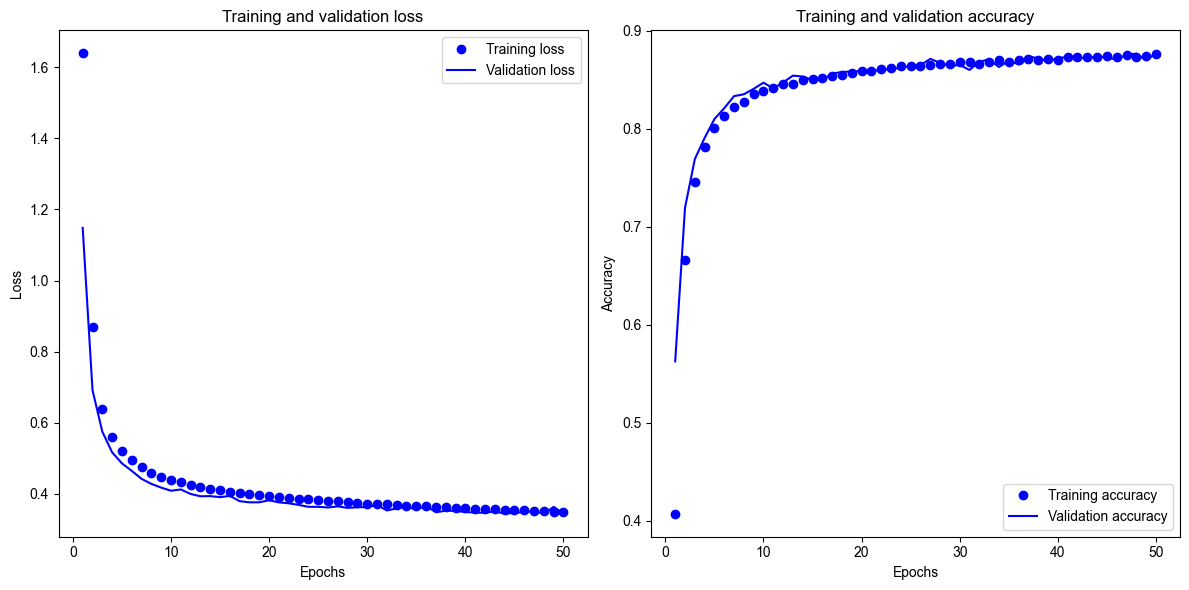

In [32]:

# 손실 값
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도 값
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 에포크 수
epochs = range(1, len(train_loss) + 1)

# 서브플롯으로 그래프 그리기
plt.figure(figsize=(12, 6))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  
plt.show()


In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

130/130 [==============================] - 0s 551us/step - loss: 0.3327 - accuracy: 0.8837
Test Accuracy: 0.8836705088615417


In [34]:
predictions = model.predict(X_test)
predictions


130/130 [==============================] - 0s 355us/step


array([[7.0572307e-05, 9.0572394e-09, 1.5192940e-03, ..., 9.9767333e-01,
        1.5319100e-07, 8.0321554e-09],
       [1.0664843e-03, 6.9752201e-02, 1.8521503e-02, ..., 1.0845923e-04,
        7.3281515e-01, 1.7769730e-01],
       [1.7355380e-04, 6.9116650e-04, 7.0334256e-01, ..., 3.6955034e-04,
        3.4091569e-02, 2.5853512e-01],
       ...,
       [2.5558755e-05, 2.0797121e-05, 9.1759634e-01, ..., 9.7513250e-05,
        1.1826660e-02, 6.6763155e-02],
       [8.8704015e-05, 1.7286873e-03, 3.5918295e-02, ..., 1.8999444e-05,
        3.2926285e-01, 6.3178807e-01],
       [8.8720510e-05, 3.6809524e-03, 2.5491098e-02, ..., 9.3329163e-06,
        5.7326537e-01, 3.9740148e-01]], dtype=float32)

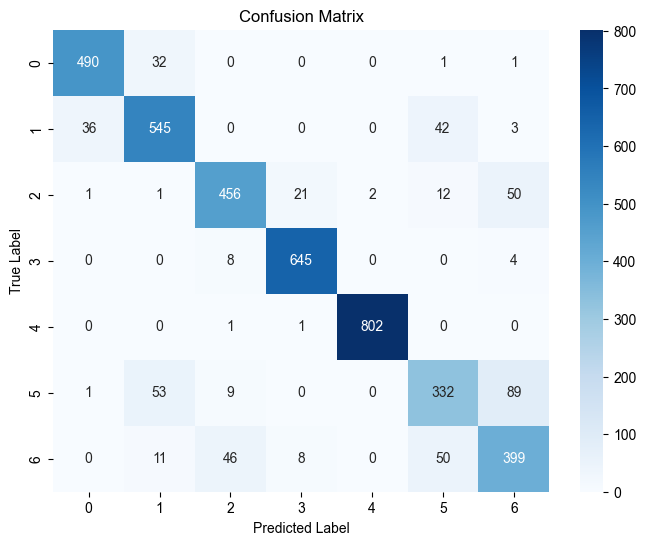

In [35]:

plt.rcParams['font.family'] = 'Arial'



output = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, output)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
class_report = classification_report(y_test, output)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       524
           1       0.85      0.87      0.86       626
           2       0.88      0.84      0.86       543
           3       0.96      0.98      0.97       657
           4       1.00      1.00      1.00       804
           5       0.76      0.69      0.72       484
           6       0.73      0.78      0.75       514

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152



# test.csv 예측

In [37]:
X_test_csv = all_df[20758:]

In [38]:
y_pred=model.predict(X_test_csv)
pred_classes=[np.argmax(element) for element in y_pred] # 가장 높은 확률인 클래스 인덱스를 리스트로 저장
predC = label_encoder.inverse_transform(pred_classes) # 인덱스를 다시 원래 클래스 이름으로 변환
test['NObeyesdad']=predC # test 데이터프레임에 비만유형 컬럼에 predC값 저장
Submission=test[['id', 'NObeyesdad']]
Submission.head(10)


433/433 [==============================] - 0s 771us/step


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
5,20763,Insufficient_Weight
6,20764,Insufficient_Weight
7,20765,Normal_Weight
8,20766,Overweight_Level_II
9,20767,Normal_Weight


In [39]:
Submission.to_csv('../csv/CJG_submission.csv', index=None)